In [12]:
import numpy as np
from sklearn import datasets
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import matplotlib

# Use float32 as the default float data type
theano.config.floatX = 'float32'
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5.0, 4.0)

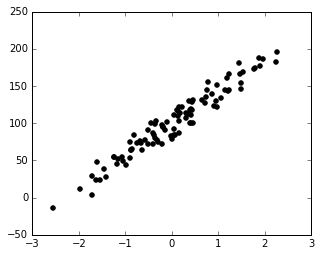

In [13]:
# Create data
n_samples = 100
n_features = 1
n_out_dim = 1
true_bias = 100
train_X, train_y, true_coef = datasets.make_regression(n_samples=n_samples,
                                                  n_features=n_features, 
                                                  n_targets=n_out_dim,
                                                  n_informative=1,
                                                  noise=10,
                                                  bias=true_bias,
                                                  coef=True,
                                                  random_state=0)
# convert array to 1-dim matrix
train_y = train_y.reshape(n_samples,1)
plt.scatter(train_X, train_y,  color='black')

In [14]:
# Define model
X = theano.shared(train_X.astype('float32'))
y = theano.shared(train_y.astype('float32'))

a = theano.shared(np.random.randn(n_features, n_out_dim).astype('float32'), name='a')
b = theano.shared(np.zeros(n_out_dim).astype('float32'), name='b')

y_hat = X.dot(a) + b
loss = T.mean(T.sqr(y-y_hat))


# Setup gradient descent
da = T.grad(loss, a)
db = T.grad(loss, b)

epsilon = np.float32(0.01)
gradient_step = theano.function([], 
                                updates=((a, a - epsilon*da),
                                         (b, b - epsilon*db)))

# define functions in order to access shared variables
f_loss = theano.function([], loss)
f_y_hat = theano.function([], y_hat)
f_a = theano.function([], a)
f_b = theano.function([], b)
print 'Coefficients: a={}, b={}'.format(f_a(), f_b())

Coefficients: a=[[-1.09568465]], b=[ 0.]


In [18]:
# build model
n_epochs = 500
for i in xrange(n_epochs):
    gradient_step()
    if i % 100 == 0:
        print i, 'loss=',f_loss()
print 'Model coefficients: a={}, b={}'.format(f_a()[0][0], f_b()[0])
print 'True coefficients:  a={}, b={}'.format(true_coef, true_bias)

0 loss= 114.17149353
100 loss= 114.17149353
200 loss= 114.17149353
300 loss= 114.17149353
400 loss= 114.17149353
Model coefficients: a=42.6195335388, b=99.1856231689
True coefficients:  a=42.3855048558, b=100


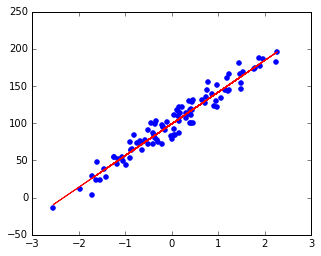

In [16]:
# plot output
plt.scatter(train_X, train_y,  color='b')
plt.plot(train_X, f_y_hat(), color='r')